In [20]:
import numpy as np
import torch
from segment_anything import sam_model_registry

In [21]:
file_path = "/Users/marcovinciguerra/Github/Python/sam_project/sam_vit_h_4b8939.pth"

try:
    with open(file_path, 'rb') as file:
        pass
    print(f"File '{file_path}' can be opened and read.")
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except PermissionError:
    print(f"You do not have permission to open '{file_path}'.")
except Exception as e:
    print(f"An error occurred while trying to open the file: {e}")

File '/Users/marcovinciguerra/Github/Python/sam_project/sam_vit_h_4b8939.pth' can be opened and read.


In [22]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

sam = sam_model_registry[MODEL_TYPE](checkpoint="/Users/marcovinciguerra/Github/Python/sam_project/sam_vit_h_4b8939.pth")
sam.to(device=DEVICE)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [23]:
import cv2
from segment_anything import SamAutomaticMaskGenerator

image_bgr = cv2.imread("/Users/marcovinciguerra/Github/Python/sam_project/half.jpg")

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


In [24]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [25]:
result = mask_generator.generate(image_rgb)

In [26]:
result

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 553979,
  'bbox': [22, 9, 815, 894],
  'predicted_iou': 1.0382341146469116,
  'point_coords': [[461.015625, 14.171875]],
  'stability_score': 0.9942033290863037,
  'crop_box': [0, 0, 843, 907]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 44774,
  'bbox': [603, 86

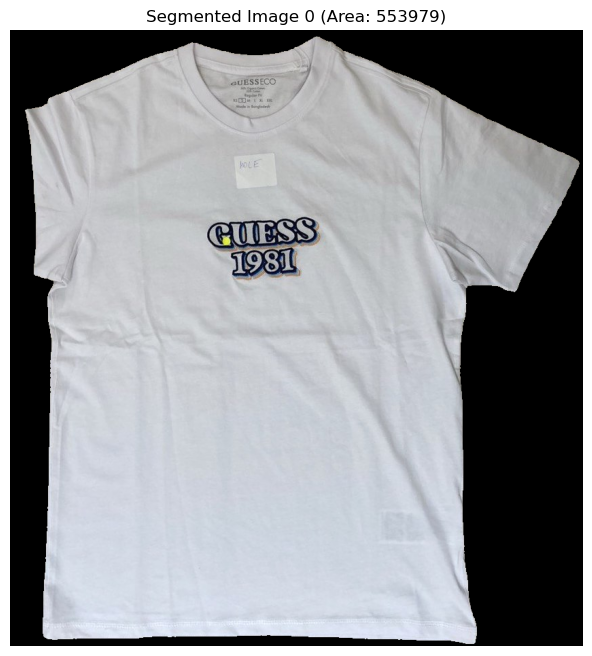

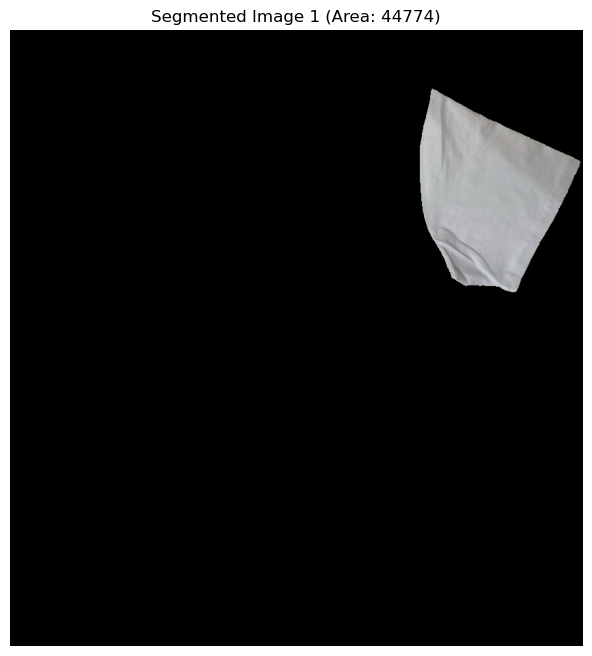

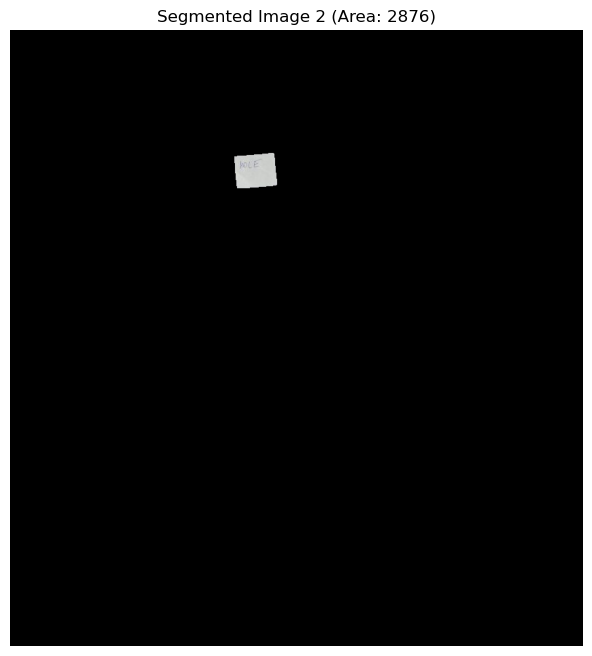

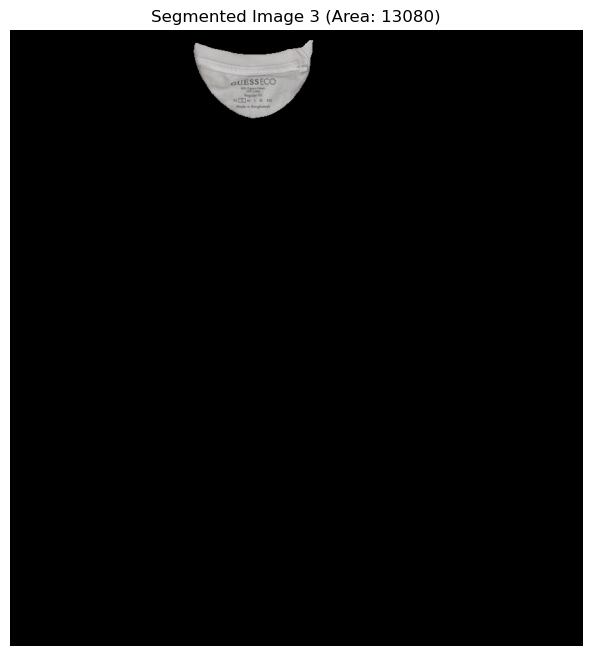

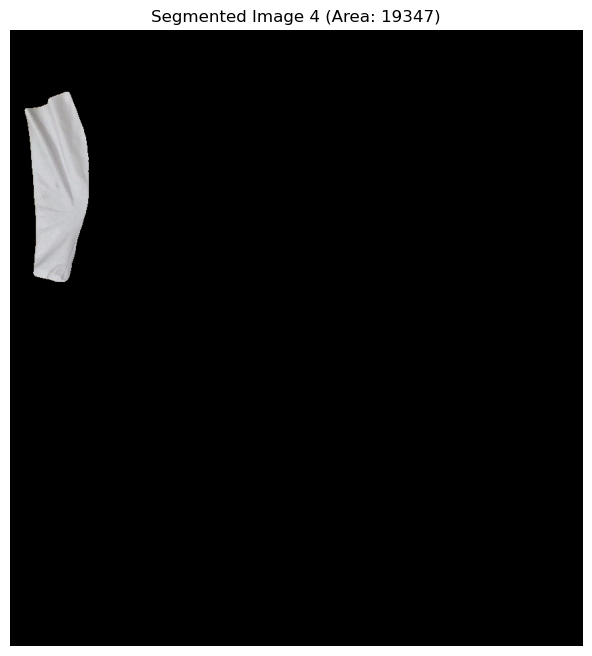

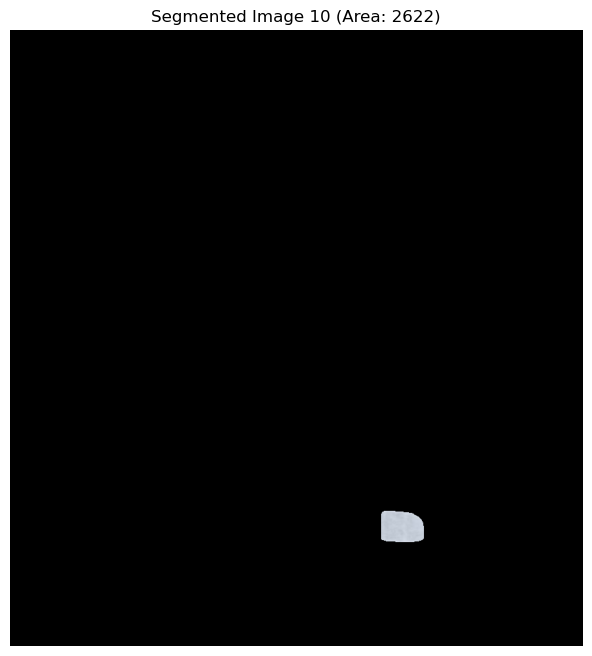

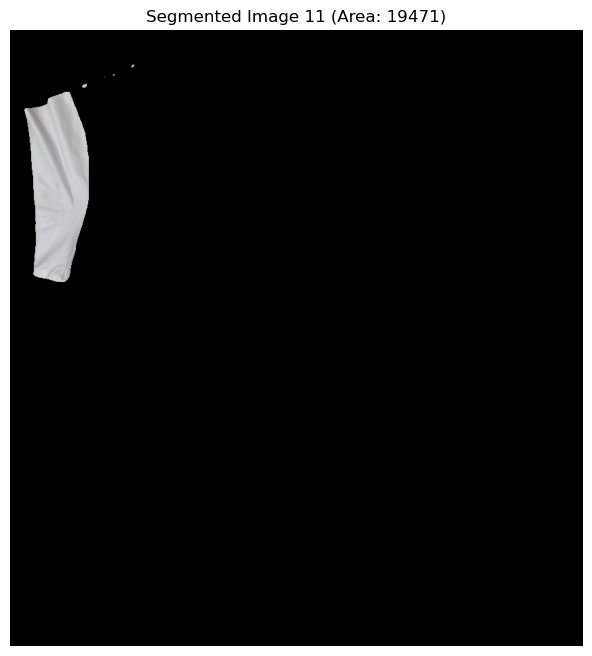

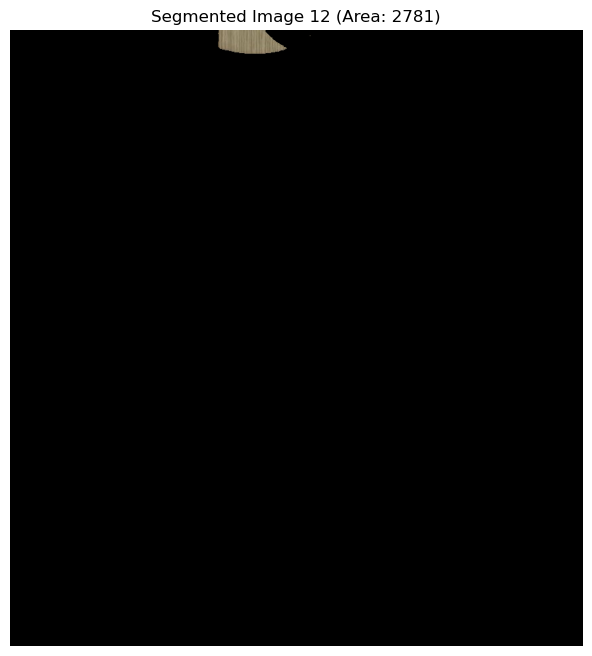

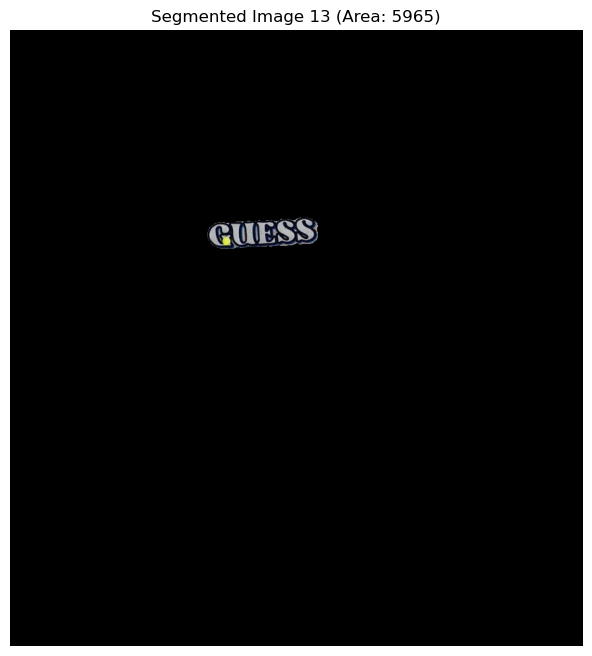

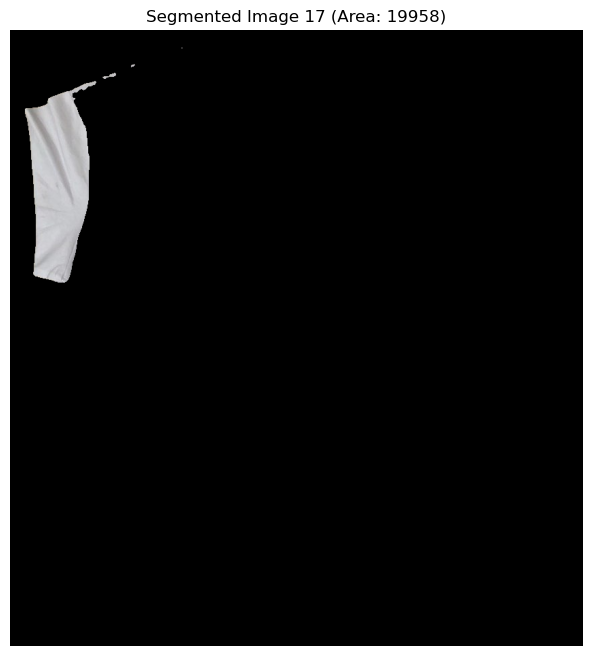

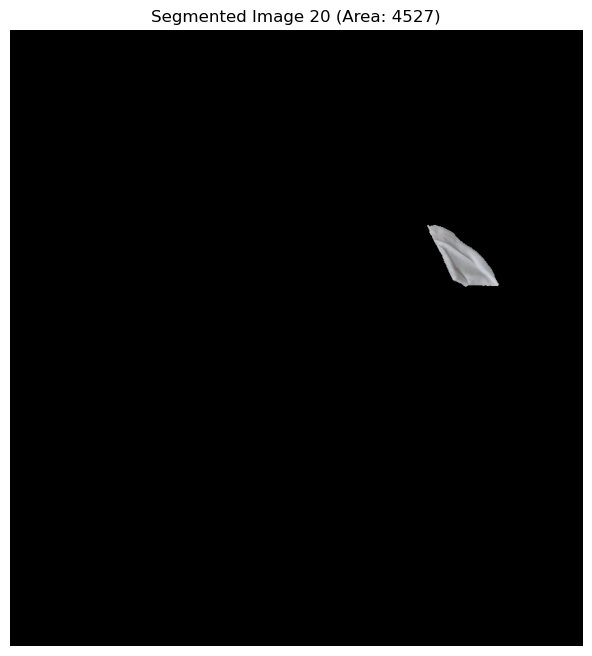

In [27]:
import matplotlib.pyplot as plt

# Itera sui risultati di segmentazione e crea un'immagine solo per le regioni che superano la soglia
for i, index in enumerate(result):
    # Estrai l'area dalla regione segmentata
    area = index['area']

    # Verifica se l'area supera la soglia minima
    if area >= 2000:
        
        # Estrai la maschera di segmentazione
        segmentation_mask = index['segmentation']

        # Applica la maschera all'immagine originale
        segmented_image = image_rgb.copy()
        segmented_image[~segmentation_mask] = [0, 0, 0]  

        # Visualizza l'immagine segmentata
        plt.figure(figsize=(8, 8))
        plt.imshow(segmented_image)
        plt.title(f'Segmented Image {i} (Area: {area})')
        plt.axis('off')
        plt.show()

# Analisi maglietta bianca

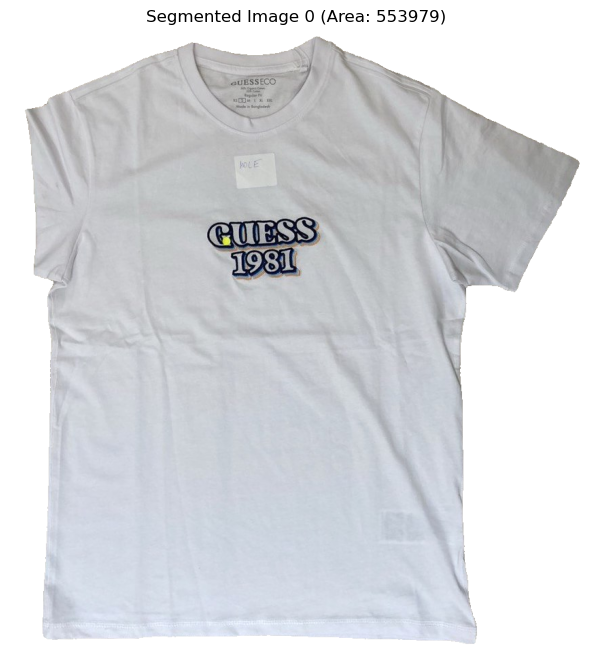

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Itera sui risultati di segmentazione e crea un'immagine solo per le regioni che superano la soglia
for i, index in enumerate(result):
    # Estrai l'area dalla regione segmentata
    area = index['area']

    # Verifica se l'area supera la soglia minima
    if area >= 2000:
        
        # Estrai la maschera di segmentazione
        segmentation_mask = index['segmentation']

        # Crea una copia dell'immagine con uno sfondo trasparente
        h, w, _ = image_rgb.shape
        segmented_image = np.zeros((h, w, 4), dtype=np.uint8)
        segmented_image[..., :3] = image_rgb
        segmented_image[..., 3] = 0  # Imposta il canale alfa a 0 inizialmente per tutti i pixel

        # Imposta il canale alfa in base alla maschera di segmentazione
        segmented_image[segmentation_mask, 3] = 255  # Imposta il canale alfa a 255 per i pixel all'interno della maschera

        # Visualizza l'immagine segmentata con sfondo trasparente
        plt.figure(figsize=(8, 8))
        plt.imshow(segmented_image)
        plt.title(f'Segmented Image {i} (Area: {area})')
        plt.axis('off')
        plt.show()
    break
# Ricorda che il canale alfa a 0 rappresenta la trasparenza totale, mentre 255 rappresenta l'opacità totale.


In [29]:
t_shirt = segmented_image

In [30]:
t_shirt

array([[[146, 132, 105,   0],
        [162, 148, 121,   0],
        [161, 147, 120,   0],
        ...,
        [122, 108,  79,   0],
        [115, 101,  72,   0],
        [114, 100,  71,   0]],

       [[143, 129, 102,   0],
        [157, 143, 116,   0],
        [157, 143, 116,   0],
        ...,
        [122, 108,  79,   0],
        [115, 101,  72,   0],
        [114, 100,  71,   0]],

       [[141, 127, 100,   0],
        [153, 139, 112,   0],
        [154, 140, 113,   0],
        ...,
        [122, 108,  79,   0],
        [115, 101,  72,   0],
        [113,  99,  70,   0]],

       ...,

       [[185, 177, 154,   0],
        [181, 173, 150,   0],
        [172, 164, 141,   0],
        ...,
        [165, 155, 130,   0],
        [171, 161, 136,   0],
        [163, 153, 128,   0]],

       [[186, 178, 155,   0],
        [182, 174, 151,   0],
        [173, 165, 142,   0],
        ...,
        [165, 155, 130,   0],
        [170, 160, 135,   0],
        [161, 151, 126,   0]],

       [[187

In [31]:
type(t_shirt)

numpy.ndarray

Dominant Color (BGR): (204, 213, 215)


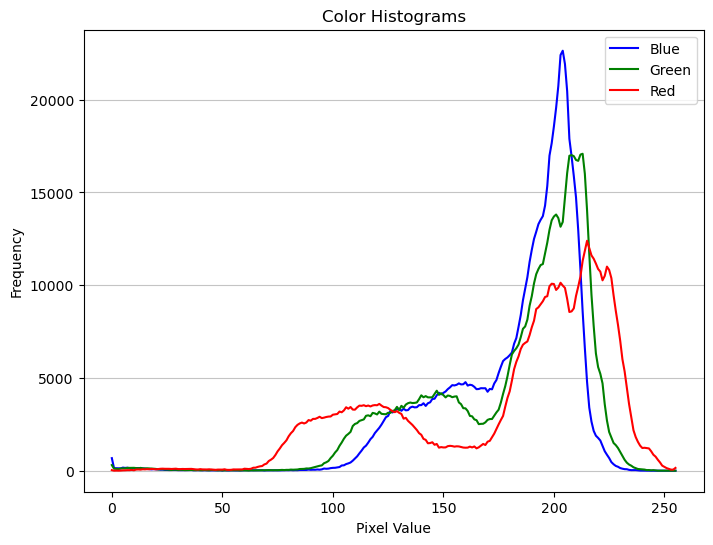

In [32]:
if t_shirt.shape[-1] == 1:
    t_shirt = cv2.cvtColor(t_shirt, cv2.COLOR_GRAY2BGR)

# Calculate histograms for each color channel (B, G, R)
b_hist = cv2.calcHist([t_shirt], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([t_shirt], [1], None, [256], [0, 256])
r_hist = cv2.calcHist([t_shirt], [2], None, [256], [0, 256])

# Find the most dominant color for each channel
b_max_value = np.argmax(b_hist)
g_max_value = np.argmax(g_hist)
r_max_value = np.argmax(r_hist)

# The most dominant color is the BGR value at the peak for each channel
dominant_color = (b_max_value, g_max_value, r_max_value)

print("Dominant Color (BGR):", dominant_color)

# Display histograms (optional)
plt.figure(figsize=(8, 6))
plt.plot(b_hist, color='b', label='Blue')
plt.plot(g_hist, color='g', label='Green')
plt.plot(r_hist, color='r', label='Red')
plt.title("Color Histograms")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


# Analisi maniche

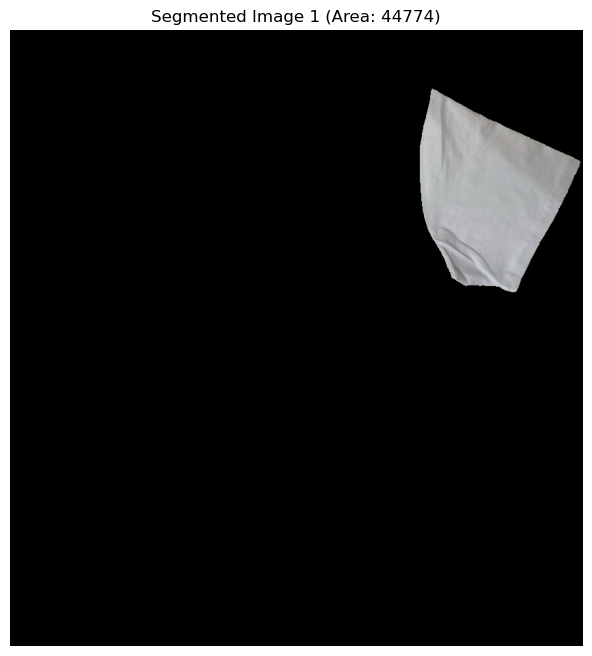

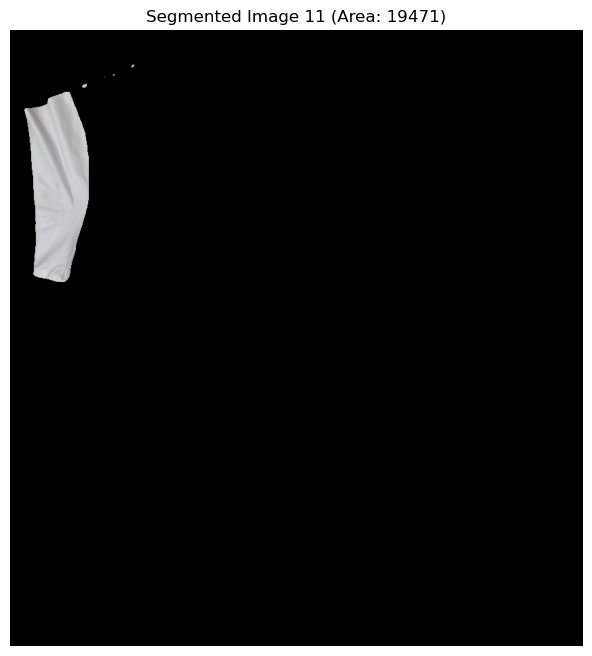

Difference in the dimensions!


In [33]:
import matplotlib.pyplot as plt

count = 0
for i, index in enumerate(result):
    # Estrai l'area dalla regione segmentata
    area = index['area']

    # Verifica se l'area supera la soglia minima
    if area >= 0:

        # Estrai la maschera di segmentazione
        segmentation_mask = index['segmentation']

        # Applica la maschera all'immagine originale
        segmented_image = image_rgb.copy()
        segmented_image[~segmentation_mask] = [0, 0, 0]  

        if count == 1 or count ==11:
            # Visualizza l'immagine segmentata
            plt.figure(figsize=(8, 8))
            plt.imshow(segmented_image)
            plt.title(f'Segmented Image {i} (Area: {area})')
            plt.axis('off')
            plt.show()

        count += 1 

        if count == 1:
            left = area
        elif count == 11:
            rigth = area
        elif count == 12:
            break  
if left>1.1*rigth or rigth>1.1*left:
    print("Difference in the dimensions!")
else:
    print("Everything is ok!")